In [30]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

import keras

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation, Conv1D, MaxPooling1D

%matplotlib inline

In [2]:
data_list = os.listdir('data/')

In [3]:
CURDIR = os.getcwd()
DATADIR = os.path.join(CURDIR, 'data')

In [4]:
type(data_list)

list

In [5]:
data_list[10]

'03-01-01-01-01-01-11.wav'

In [6]:
data_list[10][6:-16]

'01'

In [7]:
data, sampling_rate = librosa.load(os.path.join(DATADIR, data_list[10]))

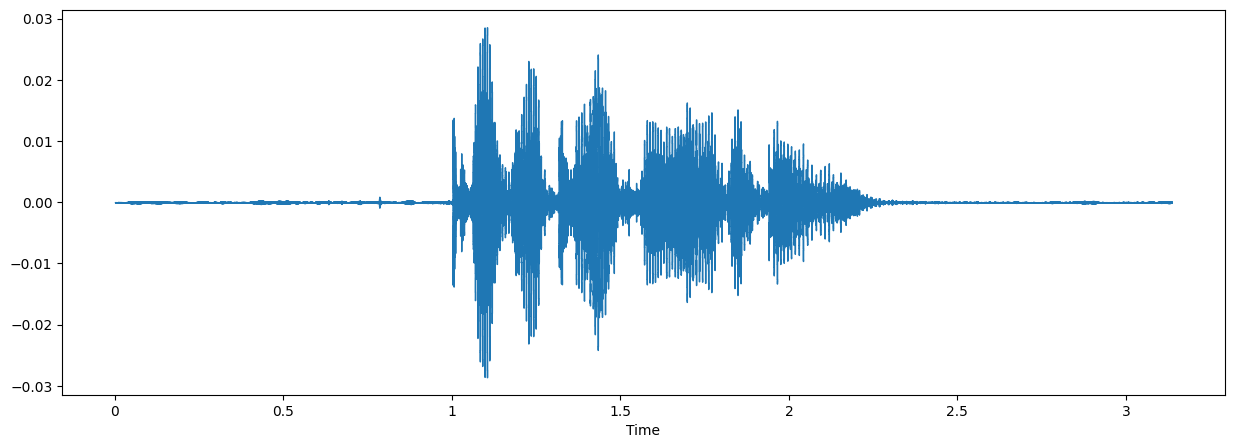

In [8]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)
plt.show()

In [9]:
df_0=pd.DataFrame(columns=['item', 'gender', 'tone'])
tone_dict={'01':'neutral',
             '02':'calm',
             '03':'happy',
             '04':'sad',
             '05':'angry',
             '06':'fearful',
             '07':'disgust',
             '08':'surprised'}
gender_dict={0:'female',
            1:'male'}

In [10]:
tone_dict.get('02')

'calm'

In [11]:
for item in data_list:
    gender=gender_dict.get(int(item[18:-4])%2)
    tone=tone_dict.get(item[6:-16])
    df_0.loc[len(df_0.index)] = [item, gender, tone] 

In [12]:
df_0.head()

,item,gender,tone
0,03-01-01-01-01-01-01.wav,male,neutral
1,03-01-01-01-01-01-02.wav,female,neutral
2,03-01-01-01-01-01-03.wav,male,neutral
3,03-01-01-01-01-01-04.wav,female,neutral
4,03-01-01-01-01-01-05.wav,male,neutral


## Getting the features

In [13]:
df_1 = pd.DataFrame(columns=list(range(216)))
for index,y in enumerate(data_list):
    X, sample_rate = librosa.load(os.path.join(DATADIR, y), res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    feature = list(mfccs)
    if len(mfccs)!=216:
        ptr = 216 - len(mfccs)
        for p in range(ptr):
            feature.append(mfccs.mean())
    df_1.loc[index] = feature

In [14]:
df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,-65.801285,...,-58.300411,-62.295700,-64.930496,-65.332520,-64.117332,-64.320320,-64.971794,-63.156208,-64.258797,-64.468193
1,-63.214157,-63.214157,-63.214157,-63.214157,-63.214157,-63.167240,-63.385445,-63.461830,-63.336105,-63.204216,...,-50.994545,-53.428989,-53.139889,-52.854271,-55.248135,-57.682434,-57.166496,-57.040077,-56.105301,-59.386353
2,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,-60.258987,...,-51.362526,-50.511784,-49.082012,-47.701584,-48.795414,-52.424294,-54.828476,-52.233757,-49.679409,-49.952641
3,-66.488457,-66.488457,-66.488457,-66.488457,-66.488457,-66.488457,-66.527412,-66.554977,-66.534813,-66.488457,...,-61.150002,-62.122272,-64.444450,-65.315735,-65.285492,-65.365860,-64.971207,-64.157776,-64.913437,-66.488457
4,-62.027878,-60.525940,-64.739456,-66.271637,-61.207905,-60.241585,-62.637955,-63.144920,-60.527340,-59.102253,...,-54.662369,-54.736412,-50.871803,-51.928799,-56.389351,-57.153385,-54.602703,-54.804359,-60.364048,-64.864937


In [15]:
labels = []
for index in range(df_0.shape[0]):
    label = df_0['gender'][index] +'_'+ df_0['tone'][index]
    labels.append(label)

In [16]:
#df_1['labels'] = labels

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_1, labels, test_size=0.2, random_state=10)

In [22]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

In [24]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [25]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [70]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
y_train.shape

(1152, 16)

In [109]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(16))
model.add(Activation('softmax'))

opt = keras.optimizers.legacy.Adam(learning_rate=0.000001, decay=1e-5)

In [110]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_48 (Conv1D)          (None, 216, 256)          1536      
                                                                 
 activation_60 (Activation)  (None, 216, 256)          0         
                                                                 
 conv1d_49 (Conv1D)          (None, 216, 128)          163968    
                                                                 
 activation_61 (Activation)  (None, 216, 128)          0         
                                                                 
 dropout_12 (Dropout)        (None, 216, 128)          0         
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 27, 128)           0         
 ng1D)                                                           
                                                     

In [111]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [112]:
history = model.fit(x_traincnn, y_train, batch_size=1, epochs=10, validation_data=(x_testcnn, y_test))

Epoch 1/10
1152/1152 [==============================] - 5s 4ms/step - loss: 3.0087 - accuracy: 0.0443 - val_loss: 2.8273 - val_accuracy: 0.0382
Epoch 2/10
1152/1152 [==============================] - 4s 4ms/step - loss: 2.8156 - accuracy: 0.0547 - val_loss: 2.7839 - val_accuracy: 0.0486
Epoch 3/10
1152/1152 [==============================] - 4s 4ms/step - loss: 2.7857 - accuracy: 0.0547 - val_loss: 2.7659 - val_accuracy: 0.0521
Epoch 4/10
1152/1152 [==============================] - 4s 4ms/step - loss: 2.7695 - accuracy: 0.0738 - val_loss: 2.7497 - val_accuracy: 0.0660
Epoch 5/10
1152/1152 [==============================] - 5s 4ms/step - loss: 2.7526 - accuracy: 0.0877 - val_loss: 2.7375 - val_accuracy: 0.0764
Epoch 6/10
1152/1152 [==============================] - 4s 4ms/step - loss: 2.7377 - accuracy: 0.0851 - val_loss: 2.7317 - val_accuracy: 0.0660
Epoch 7/10
1152/1152 [==============================] - 5s 4ms/step - loss: 2.7218 - accuracy: 0.1016 - val_loss: 2.7214 - val_accuracy:

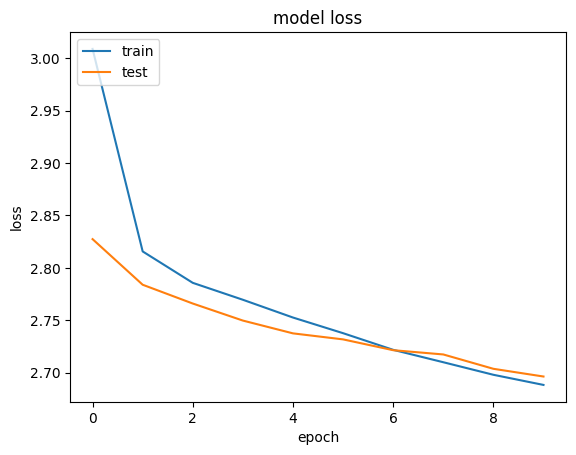

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [108]:
score = model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 14.24%


In [160]:
def runit(op):
    model = Sequential()
    
    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(216,1)))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(16))
    model.add(Activation('softmax'))
    
    try:
        opt = op(learning_rate=0.000001, decay=1e-5)
    except:
        opt = op(learning_rate=0.000001)
    
    model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
    
    history = model.fit(x_traincnn, y_train, batch_size=1, epochs=500, validation_data=(x_testcnn, y_test))
    
    score = model.evaluate(x_testcnn, y_test, verbose=0)
    acc = "%s: %.2f%%" % (model.metrics_names[1], score[1]*100)
    return history, acc

In [161]:
optimizers = [keras.optimizers.legacy.Adadelta, keras.optimizers.legacy.Adagrad, keras.optimizers.legacy.Adam, keras.optimizers.legacy.Adamax, 
       keras.optimizers.legacy.RMSprop, keras.optimizers.legacy.SGD]

op = [keras.optimizers.Adadelta, keras.optimizers.Adagrad, keras.optimizers.Adam, keras.optimizers.Adamax, keras.optimizers.AdamW, keras.optimizers.Adafactor, 
       keras.optimizers.Nadam, keras.optimizers.Ftrl, keras.optimizers.RMSprop, keras.optimizers.Lion, keras.optimizers.SGD]

In [ ]:
df_test = pd.DataFrame(columns=['Optimizer', 'Accuracy'])
for o in optimizers:
    history, acc = runit(o)
    df_test.loc[len(df_test.index)] = [o, acc]

In [ ]:
df_test

In [169]:
history_rms, acc_rms = runit(keras.optimizers.legacy.RMSprop)

Epoch 1/500
1152/1152 [==============================] - 5s 4ms/step - loss: 4.1427 - accuracy: 0.0564 - val_loss: 2.8389 - val_accuracy: 0.0521
Epoch 2/500
1152/1152 [==============================] - 5s 4ms/step - loss: 3.3647 - accuracy: 0.0477 - val_loss: 2.7802 - val_accuracy: 0.0799
Epoch 3/500
1152/1152 [==============================] - 5s 4ms/step - loss: 3.1691 - accuracy: 0.0608 - val_loss: 2.7701 - val_accuracy: 0.0972
Epoch 4/500
1152/1152 [==============================] - 5s 4ms/step - loss: 3.0979 - accuracy: 0.0694 - val_loss: 2.7636 - val_accuracy: 0.0972
Epoch 5/500
1152/1152 [==============================] - 5s 4ms/step - loss: 3.0493 - accuracy: 0.0538 - val_loss: 2.7566 - val_accuracy: 0.0972
Epoch 6/500
1152/1152 [==============================] - 5s 4ms/step - loss: 3.0058 - accuracy: 0.0547 - val_loss: 2.7521 - val_accuracy: 0.1111
Epoch 7/500
1152/1152 [==============================] - 5s 4ms/step - loss: 2.9734 - accuracy: 0.0703 - val_loss: 2.7483 - val_ac

In [170]:
print(acc_rms)

accuracy: 33.33%


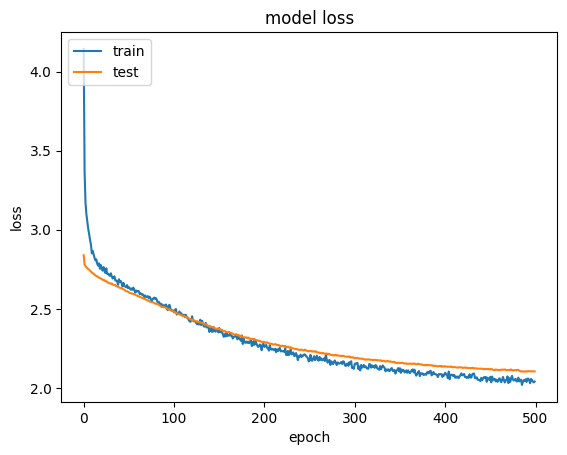

In [171]:
plt.plot(history_rms.history['loss'])
plt.plot(history_rms.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [172]:
history_lion, acc_lion = runit(keras.optimizers.RMSprop)

Epoch 1/500
1152/1152 [==============================] - 5s 4ms/step - loss: 3.8513 - accuracy: 0.0616 - val_loss: 2.9392 - val_accuracy: 0.0382
Epoch 2/500
1152/1152 [==============================] - 5s 4ms/step - loss: 3.3107 - accuracy: 0.0495 - val_loss: 2.7983 - val_accuracy: 0.0417
Epoch 3/500
1152/1152 [==============================] - 5s 4ms/step - loss: 3.1201 - accuracy: 0.0582 - val_loss: 2.7647 - val_accuracy: 0.0660
Epoch 4/500
1152/1152 [==============================] - 5s 4ms/step - loss: 3.0205 - accuracy: 0.0807 - val_loss: 2.7536 - val_accuracy: 0.0833
Epoch 5/500
1152/1152 [==============================] - 5s 4ms/step - loss: 2.9825 - accuracy: 0.0660 - val_loss: 2.7428 - val_accuracy: 0.0833
Epoch 6/500
1152/1152 [==============================] - 5s 4ms/step - loss: 2.9591 - accuracy: 0.0590 - val_loss: 2.7369 - val_accuracy: 0.0833
Epoch 7/500
1152/1152 [==============================] - 5s 4ms/step - loss: 2.8934 - accuracy: 0.0686 - val_loss: 2.7307 - val_ac

In [173]:
print(acc_lion)

accuracy: 31.94%


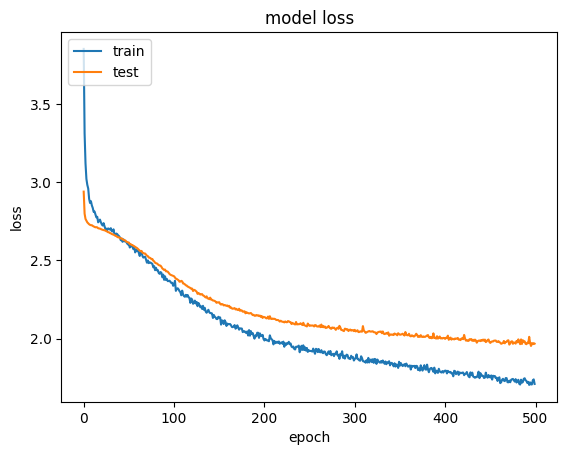

In [174]:
plt.plot(history_lion.history['loss'])
plt.plot(history_lion.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from keras import backend as K
import tensorflow as tf
#K.tensorflow_backend._get_available_gpus()


In [152]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [153]:
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

AttributeError: module 'tensorflow' has no attribute 'ConfigProto'

In [72]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

In [59]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [60]:
device

device(type='cuda', index=0)

In [75]:
tensor_x_train = torch.Tensor(x_traincnn)
tensor_y_train = torch.Tensor(y_train)

trainset = TensorDataset(tensor_x_train,tensor_y_train) 
train_dataloader = DataLoader(trainset) 

tensor_x_test = torch.Tensor(x_testcnn)
tensor_y_test = torch.Tensor(y_test)

testset = TensorDataset(tensor_x_test,tensor_y_test) 
test_dataloader = DataLoader(testset) 

(1152, 16)

In [61]:
opt = torch.optim.RMSprop(model.parameters(), lr=0.00001)

In [88]:
def run(params):
    device = params.get('dev')
    EPOCHS = params.get('epochs')
    BATCH_SIZE = params.get('batch_size')
    OPTIMIZER = params.get('optimizer')
    LEARNING_RATE = params.get('learning_rate')
    # Create a Sequential (feed-forward) model.
    # 784 inputs.
    # Two fully-connected layers with 25 and 10 neurons.
    # tanh as activation function for hidden layer.
    # Logistic (sigmoid) as activation function for output layer.
    model = nn.Sequential(
        nn.Conv1d(1, 256, kernel_size=5, padding=2),
        nn.ReLU(),
        nn.Conv1d(256, 128, kernel_size=5, padding=2),
        nn.ReLU(),
        nn.Dropout(0.1),
        nn.MaxPool1d(8),
        nn.Conv1d(128, 128, kernel_size=5, padding=2),
        nn.ReLU(),
        nn.Conv1d(128, 128, kernel_size=5, padding=2),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(128 * 216, 16),
        nn.Softmax(dim=1)
    )

    # Initialize weights.
    for module in model.modules():
        if isinstance(module, nn.Linear):
            nn.init.uniform_(module.weight, a=-0.1, b=0.1)
            nn.init.constant_(module.bias, 0.0)

    # Use stochastic gradient descent (SGD) with
    # learning rate of 0.01 and no other bells and whistles.
    # MSE as loss function.
    optimizer = OPTIMIZER(model.parameters(), lr=LEARNING_RATE)
    loss_function = nn.CrossEntropyLoss()

    # Transfer model to GPU
    model.to(device)

    # Create DataLoader objects that will help create mini-batches.
    trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
    testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

    # Train the model. In PyTorch we have to implement the training loop ourselves.
    for i in range(EPOCHS):
        model.train() # Set model in training mode.
        train_loss = 0.0
        train_correct = 0
        train_batches = 0
        for inputs, targets in trainloader:
            # Move data to GPU.
            #one_hot_targets = nn.functional.one_hot(targets, num_classes=10).float()
            #inputs, targets, one_hot_targets = inputs.to(device), targets.to(device), one_hot_targets.to(device)
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Zero the parameter gradients.
            optimizer.zero_grad()

            # Forward pass.
            outputs = model(inputs)
            loss = loss_function(outputs, targets)

            # Accumulate metrics.
            _, indices = torch.max(outputs.data, 1)
            train_correct += (indices == targets).sum().item()
            train_batches +=  1
            train_loss += loss.item()

            # Backward pass and update.
            loss.backward()
            optimizer.step()

        train_loss = train_loss / train_batches
        train_acc = train_correct / (train_batches * BATCH_SIZE)

        # Evaluate the model on the test dataset. Identical to loop above but without
        # weight adjustment.
        model.eval() # Set model in inference mode.
        test_loss = 0.0
        test_correct = 0
        test_batches = 0
        for inputs, targets in testloader:
            #one_hot_targets = nn.functional.one_hot(targets, num_classes=16).float()
            #inputs, targets, one_hot_targets = inputs.to(device), targets.to(device), one_hot_targets.to(device)
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            _, indices = torch.max(outputs, 1)
            test_correct += (indices == targets).sum().item()
            test_batches +=  1
            test_loss += loss.item()

        test_loss = test_loss / test_batches
        test_acc = test_correct / (test_batches * BATCH_SIZE)

        print(f'Epoch {i+1}/{EPOCHS} loss: {train_loss:.4f} - acc: {train_acc:0.4f} - val_loss: {test_loss:.4f} - val_acc: {test_acc:0.4f}')
    return test_acc


In [89]:
params = {
    'dev' : device,
    'epochs' : 1,
    'batch_size' : 8,
    'optimizer' : torch.optim.RMSprop,
    'learning_rate' : 0.00001
}

In [90]:
test_acc = run(params)

RuntimeError: Given groups=1, weight of size [256, 1, 5], expected input[8, 216, 1] to have 1 channels, but got 216 channels instead